In [1]:
import numpy as np

import sys 
import os 
sys.path.append(os.path.abspath("/Users/eshasaha/Desktop/HARFE-main/harfe"))
# import test_standard.py

from harfe import *
from utils import *
# !pip install git+https://github.com/esaha2703/HARFE.git
# from harfe.harfe import harfe 
# from .data_simulation import generate_omega_bias,feature_matrix

In [2]:
# np.random.seed(1)

In [3]:
def target_func(X): 
    return 10*np.sin(np.pi*X[:,0]*X[:,1]) + 20*(X[:,2]-0.5)**2 + 10*X[:,3] + 5*X[:,4]


In [4]:
# np.random.seed(0)
num_data_train = 200 # number of data points for training data set
num_data_val = 1000  # number of data points for validation data set
num_data_tot = num_data_train + num_data_val


'''parameters to be changed everytime'''
d = 10 # input dimension for target function; d<10 suggested
Nf = 10*num_data_train
q=2


mean = 0
std = 1.0

num_sets = 1 #number of to datasets
act = 'sin'
Dict_type = 'SRF'


In [5]:
X_train = np.random.uniform(0,1,(num_data_train,d))
Y_train = target_func(X_train) 
X_val = np.random.uniform(0,1,(num_data_val,d))
Y_val = target_func(X_val)


noise_train  = np.random.uniform(mean,std,(Y_train.shape[0]))
noise_val  = np.random.uniform(mean,std,(Y_val.shape[0]))
Y_train_noisy = Y_train + noise_train
Y_val_noisy = Y_val + noise_val

Omega,bias = generate_omega_bias(rows = Nf,columns = d,weight = 1,par1 = -1,par2 = 1,
                                 distribution = 'norm-uni',bool_bias = True,sparsity = q)

A_train = feature_matrix(X_train,Omega,bias,activation = act,dictType = Dict_type)
A_val = feature_matrix(X_val,Omega,bias,activation = act,dictType = Dict_type)

scale_A = np.linalg.norm(A_train, axis = 0) 
A_train /= scale_A 
A_val /= scale_A

coeff,rel_error,iterations,_ = harfe(Y_train_noisy,A_train,N = Nf, s = 200, lam = 1e-3)


y_val_rec = np.matmul(A_val,coeff)
print(y_val_rec.reshape(-1).shape,Y_val.shape)
mse = np.linalg.norm(y_val_rec.reshape(-1) - Y_val)**2/num_data_val



(1000,) (1000,)


In [9]:
print('mean square error:',mse,'\nIterations required:',iterations)

mean square error: 0.8262211060600497 
Iterations required: 16


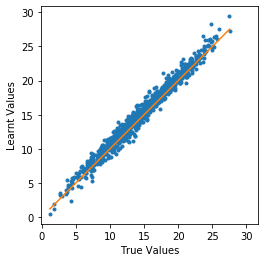

In [18]:
x = np.linspace(np.min(Y_val),np.max(Y_val),1000)
plt.plot(Y_val,y_val_rec,'.')
plt.plot(x,x)
plt.ylabel('Learnt Values')
plt.xlabel('True Values')
plt.axis('square')
plt.show()